# Implementación con la librería scipy.cluster (kmeans)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time

from scipy.cluster.vq import kmeans,vq
from sklearn import metrics
import sys

In [2]:
df= pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df['Month'].replace({'Jan' : 1, 'Feb' : 2, 'Mar':3,'Apr':4,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}, inplace = True)

In [4]:
df['VisitorType'].replace({'Returning_Visitor' : 1, 'New_Visitor' : 0,'Other':2}, inplace = True)

In [5]:
df['Weekend'].replace({ True : 1, False : 0}, inplace = True)

In [6]:
df['Revenue'].replace({True : 1, False : 0}, inplace = True)

In [7]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1,0


Implementamos el algoritmo con la implementación de la librería Scipy.

In [8]:
data=df.values

In [9]:
data

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 4., 75.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [10]:
t1=time.time()

In [11]:
#K = 2 (2 clusters)
centroids,_ = kmeans(data,2)

In [12]:
t2=time.time()
tiempo = float(t2-t1)

print('K-means utilizando scipy.kmeans() para k=2')
print("Tiempo de ejecucion: {} segundos".format(tiempo))

K-means utilizando scipy.kmeans() para k=2
Tiempo de ejecucion: 0.09563422203063965 segundos


In [13]:
idx,_ = vq(data,centroids)
idx,_

(array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 array([538.23095378, 474.71603155, 538.25239171, ..., 355.88434848,
        190.15173128, 517.05926745]))

In [14]:
centroids

array([[4.51057040e+00, 1.65698623e+02, 1.26565616e+00, 9.71313541e+01,
        8.69888313e+01, 3.78245596e+03, 7.23309750e-03, 2.17721955e-02,
        7.77290375e+00, 4.98603909e-02, 8.57838053e+00, 2.13242920e+00,
        2.30355006e+00, 3.07897886e+00, 3.79936179e+00, 9.56521739e-01,
        2.22576785e-01, 2.53689669e-01],
       [1.75486104e+00, 5.91557591e+01, 3.09070549e-01, 1.84807454e+01,
        1.76288303e+01, 5.34317805e+02, 2.60089938e-02, 4.85090810e-02,
        5.40851876e+00, 6.43795175e-02, 7.41555533e+00, 2.12185687e+00,
        2.37076250e+00, 3.16481727e+00, 4.13855238e+00, 8.47297160e-01,
        2.35162374e-01, 1.29492009e-01]])

In [15]:
# Medimos el tamaño en bytes del objeto
print(sys.getsizeof(centroids,_), 'bytes')

400 bytes


In [16]:
metrics.silhouette_score(data, idx, metric='euclidean')

0.7195220217363449

In [17]:
t1=time.time()

In [18]:
#K = 3 (3 clusters)
centroids,_ = kmeans(data,3)

In [19]:
t2=time.time()
tiempo = float(t2-t1)

print('K-means utilizando scipy.kmeans() para k=3')
print("Tiempo de ejecucion: {} segundos".format(tiempo))

K-means utilizando scipy.kmeans() para k=3
Tiempo de ejecucion: 0.12572002410888672 segundos


In [20]:
idx,_ = vq(data,centroids)
idx,_

(array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([319.34680371, 256.22552386, 319.38254543, ..., 139.97587111,
         45.4613431 , 298.25809502]))

In [21]:
centroids

array([[1.43430079e+00, 4.50361641e+01, 2.22823219e-01, 1.24416596e+01,
        1.24922164e+01, 3.15596993e+02, 3.09611434e-02, 5.53584209e-02,
        4.13370013e+00, 6.69920844e-02, 7.31833773e+00, 2.11807388e+00,
        2.36701847e+00, 3.16068602e+00, 4.22282322e+00, 8.37071240e-01,
        2.27440633e-01, 1.07255937e-01],
       [3.23961073e+00, 1.20257273e+02, 7.52761704e-01, 5.07616098e+01,
        4.44163598e+01, 1.73662696e+03, 8.61283394e-03, 2.41312698e-02,
        9.05192603e+00, 5.43924250e-02, 7.95528669e+00, 2.12993161e+00,
        2.33534982e+00, 3.18385060e+00, 3.88190426e+00, 9.05839032e-01,
        2.42766965e-01, 2.12256707e-01],
       [5.65084388e+00, 2.08756531e+02, 1.74894515e+00, 1.45296673e+02,
        1.34690928e+02, 6.05099154e+03, 6.52769978e-03, 2.08055675e-02,
        7.24227816e+00, 4.51476793e-02, 9.10337553e+00, 2.14767932e+00,
        2.36497890e+00, 2.89451477e+00, 3.59704641e+00, 9.83122363e-01,
        2.33122363e-01, 3.03797468e-01]])

In [22]:
metrics.silhouette_score(data, idx, metric='euclidean')

0.6080537479173377

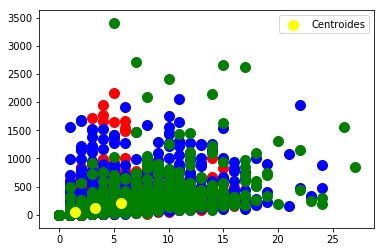

In [23]:
#Visualizamos los cluster
plt.scatter(data[idx == 0, 0], data[idx == 0, 1], s = 100, c = 'red', )
plt.scatter(data[idx == 1, 0], data[idx == 1, 1], s = 100, c = 'blue',)
plt.scatter(data[idx == 2, 0], data[idx == 2, 1], s = 100, c = 'green')



#Graficamos los centroides en amarillo
plt.scatter(centroids[:, 0], centroids[:,1], s = 100, c = 'yellow', label = 'Centroides')

plt.legend()

In [24]:
t1=time.time()

In [25]:
#K = 4 (4 clusters)
centroids,_ = kmeans(data,4)

In [26]:
t2=time.time()
tiempo = float(t2-t1)

print('K-means utilizando scipy.kmeans() para k=4')
print("Tiempo de ejecucion: {} segundos".format(tiempo))

K-means utilizando scipy.kmeans() para k=4
Tiempo de ejecucion: 0.16804814338684082 segundos


In [27]:
idx,_ = vq(data,centroids)
idx,_

(array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 array([202.81557954, 140.37813368, 202.87052731, ...,  40.78491907,
        152.70924023, 181.85320639]))

In [28]:
centroids

array([[2.56128353e+00, 9.32284489e+01, 4.84481852e-01, 3.13802408e+01,
        2.94352972e+01, 9.99248193e+02, 9.04749197e-03, 2.54401504e-02,
        9.14393284e+00, 5.73908469e-02, 7.71567596e+00, 2.12361915e+00,
        2.38111520e+00, 3.11862178e+00, 3.96238822e+00, 8.59810626e-01,
        2.54865860e-01, 2.03051026e-01],
       [1.18838599e+00, 3.52106351e+01, 1.80871050e-01, 9.09680208e+00,
        9.19231426e+00, 1.99220218e+02, 3.74971669e-02, 6.41155562e-02,
        2.89884034e+00, 6.93082835e-02, 7.21810418e+00, 2.12194705e+00,
        2.36464560e+00, 3.17967549e+00, 4.27549103e+00, 8.37233134e-01,
        2.20836892e-01, 8.19812126e-02],
       [3.98804598e+00, 1.44723614e+02, 1.01839080e+00, 7.06117692e+01,
        6.46110345e+01, 2.68351771e+03, 7.60311485e-03, 2.24592775e-02,
        8.26690203e+00, 5.27816092e-02, 8.33885057e+00, 2.13195402e+00,
        2.30482759e+00, 3.19540230e+00, 3.78896552e+00, 9.45287356e-01,
        2.23908046e-01, 2.23908046e-01],
       [6.377

In [29]:
metrics.silhouette_score(data, idx, metric='euclidean')

0.5390293440827396